# 1. Importing necessary libraries

In [1]:
!pip install tensorflow

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4848 sha256=23d2a51f719c26334f358b62d5872f63154e6a838a3cae32005453c44d9e8c30
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\b6\0d\90\0d1bbd99855f99cb2f6c2e5ff96f8023fad8ec367695f7d72d
Successfully built termcolor


In [120]:
#import tensorflow as tf
from tensorflow import keras

from matplotlib import pyplot as plt
import pandas as pd

from keras import Sequential

from keras.layers import Flatten, Dense   #Flatten -- for adding input layer -- to convert n dim to 1D as NN can have only single input layer
                                          #Dense   -- for adding hidden layers -- we can select activation functions in Dense
import seaborn as sns

# 2. Importing Dataset

In [5]:
(X_train, y_train), (X_test, y_test)=keras.datasets.mnist.load_data(path="mnist.npz")

# 3. Data Understanding

In [8]:
X_train.shape,y_train.shape  #X_train has 60,000 images of size 28x28

((60000, 28, 28), (60000,))

In [9]:
X_test.shape,y_test.shape 

((10000, 28, 28), (10000,))

In [64]:
y_train[59000]

6

In [62]:
X_train #Its in 3d format (60,000, 28, 28)

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [36]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

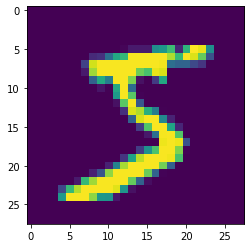

In [11]:
plt.imshow(X_train[0])

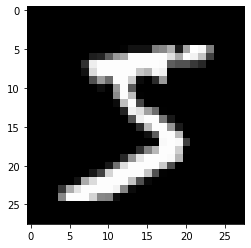

In [12]:
plt.imshow(X_train[0],cmap='gray')

In [18]:
pd.set_option('display.max_columns',None)
pd.DataFrame(X_train[0])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0


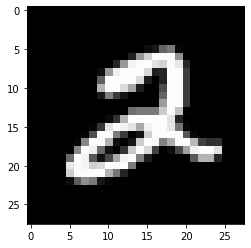

In [26]:
plt.imshow(X_train[5],cmap='gray')

In [27]:
pd.DataFrame(X_train[5])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,25,100,122,7,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,33,151,208,252,252,252,146,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,40,152,244,252,253,224,211,252,232,40,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,15,152,239,252,252,252,216,31,37,252,252,60,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,96,252,252,252,252,217,29,0,37,252,252,60,0,0,0,0,0,0,0


# 5. Model Building
* **Step 1: Build the architecture**
* **Step 2: Compile our network**

## 5.1 Building the NN architecture

In [142]:
dl_model=Sequential()
dl_model.add(Flatten(input_shape=(28,28,1)))
dl_model.add(Dense(50,activation = 'relu'))
# dl_model.add(Dense(20,activation='tanh'))
dl_model.add(Dense(10,activation='softmax'))
dl_model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_14 (Flatten)        (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 50)                39250     
                                                                 
 dense_19 (Dense)            (None, 10)                510       
                                                                 
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


## 5.2 Compile the architecture

In [143]:
dl_model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics='sparse_categorical_accuracy')

### Trying different optimizers

In [128]:
#gd or vanilla gd
grad_descent = keras.optimizers.SGD(learning_rate=0.01, momentum=0.0, nesterov=False) #Copied from keras doccumentation from optimizers section
                                                                                      #During training, set batch_size=1 for simple gd
                                                                                      #It takes lot of time as all 60,000 images are sent as 1 batch. So each iterarion takes around 2-3 mins and for 10 epochs, a lot of time is consumed

In [135]:
mini_gd = keras.optimizers.SGD(learning_rate=0.01, momentum=0.0, nesterov=False)  #batch_size will be present

In [138]:
sgd = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=False)  #For stochastic gd, momentum comes

In [ ]:
nag = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)   #For NAG optimization, nesterov is True

In [145]:
adam = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
#     epsilon=1e-07,
#     amsgrad=False,
#     name="Adam"

In [146]:
#And compile step also changes in optimization technique 
dl_model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics='sparse_categorical_accuracy')

# 6. Model Training

In [147]:
dl_model.fit(x=X_train, y=y_train, batch_size=32, epochs=10, validation_data=(X_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4883 - sparse_categorical_accuracy: 0.9108 - val_loss: 0.5287 - val_sparse_categorical_accuracy: 0.8979
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3497 - sparse_categorical_accuracy: 0.9219 - val_loss: 0.4908 - val_sparse_categorical_accuracy: 0.9164
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3031 - sparse_categorical_accuracy: 0.9288 - val_loss: 0.4167 - val_sparse_categorical_accuracy: 0.9255
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2802 - sparse_categorical_accuracy: 0.9345 - val_loss: 0.4005 - val_sparse_categorical_accuracy: 0.9317
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2588 - sparse_categorical_accuracy: 0.9381 - val_loss: 0.3861 - val_sparse_categorical_accuracy: 0.9312
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2413 - spars

## Adam optimizer is giving better accuracy and minimum loss

## Scaling the X_train and X_test values
* **Divide by 255 to make it in the range of 0-1**

In [148]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

dl_model.fit(x=X_train_scaled, y=y_train, batch_size=32, epochs=10, validation_data=(X_test_scaled,y_test))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5603 - sparse_categorical_accuracy: 0.8139 - val_loss: 0.2251 - val_sparse_categorical_accuracy: 0.9361
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1869 - sparse_categorical_accuracy: 0.9452 - val_loss: 0.1606 - val_sparse_categorical_accuracy: 0.9539
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1379 - sparse_categorical_accuracy: 0.9597 - val_loss: 0.1313 - val_sparse_categorical_accuracy: 0.9615
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1086 - sparse_categorical_accuracy: 0.9682 - val_loss: 0.1131 - val_sparse_categorical_accuracy: 0.9656
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0892 - sparse_categorical_accuracy: 0.9738 - val_loss: 0.1067 - val_sparse_categorical_accuracy: 0.9667
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0761 - spars

# 7. Model Testing

In [149]:
dl_model.evaluate(x=X_test,y=y_test)

313/313 [==============================] - 0s 1ms/step - loss: 17.5833 - sparse_categorical_accuracy: 0.9691


[17.583335876464844, 0.9690999984741211]

In [150]:
dl_model.evaluate(x=X_test_scaled,y=y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1076 - sparse_categorical_accuracy: 0.9667


[0.10757960379123688, 0.96670001745224]

### Checking if prediction matches with actual values

In [110]:
y_test[1]

2

In [109]:
np.argmax(y_pred[1])

2

In [111]:
y_test[0]

7

In [112]:
np.argmax(y_pred[0])

7

# 8. Model Predictions

In [151]:
y_pred=dl_model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


# 9. Model Performance Evaluation

## Confusion matrix

In [152]:
y_pred[1]  #We get the similarity kind od scores for each numbers

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [153]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [154]:
y_pred_list=[np.argmax(i) for i in y_pred]  #argmax gives the index of the class which has maximum score
y_pred_list[:5]                             #Here 1st value is 7 which is triggered and has high score. So that neuron is triggered and is the output

[7, 2, 1, 0, 4]

In [155]:
confusion_matrix = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_list)
confusion_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 969,    1,    1,    0,    1,    2,    2,    0,    3,    1],
       [   0, 1123,    1,    2,    1,    0,    2,    0,    6,    0],
       [   2,    2,  999,   14,    1,    2,    3,    2,    7,    0],
       [   0,    0,    6,  992,    1,    4,    0,    2,    4,    1],
       [   2,    0,    1,    0,  956,    0,    8,    3,    1,   11],
       [   2,    1,    0,   19,    0,  851,   13,    1,    5,    0],
       [   3,    2,    1,    2,    3,    7,  939,    0,    1,    0],
       [   0,    9,   10,    8,    0,    1,    0,  983,    4,   13],
       [   2,    0,    4,   24,    5,    4,    4,    4,  925,    2],
       [   4,    8,    1,   14,   11,    7,    0,    8,    2,  954]])>

Text(69.0, 0.5, 'Actual')

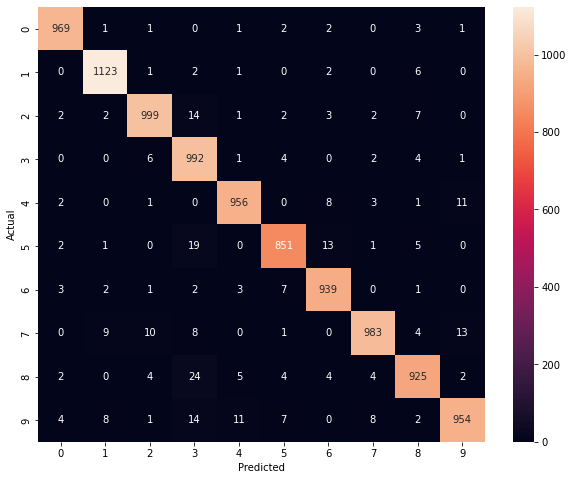

In [156]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix,annot=True, fmt='d') #fmt for showing annots as digits else it showed exp values
plt.xlabel('Predicted')
plt.ylabel('Actual')

# 10. Model Deployment

In [157]:
dl_model.save('digit_classifier.h5')  #.h5 extension is mandatory for any NN not like .pkl in ML which was not mandatory